<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bootstrap" data-toc-modified-id="Bootstrap-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bootstrap</a></span></li><li><span><a href="#Statistical-property-of-[mean-of-the-N-numbers]" data-toc-modified-id="Statistical-property-of-[mean-of-the-N-numbers]-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Statistical property of [mean of the N numbers]</a></span><ul class="toc-item"><li><span><a href="#Generating-N-random-numbers" data-toc-modified-id="Generating-N-random-numbers-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Generating N random numbers</a></span></li><li><span><a href="#By-theory" data-toc-modified-id="By-theory-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>By theory</a></span></li><li><span><a href="#Or,-doing-monate-carlo,-because-we-know-how-the-N-numbers-were-generated!" data-toc-modified-id="Or,-doing-monate-carlo,-because-we-know-how-the-N-numbers-were-generated!-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Or, doing monate carlo, because we know how the N numbers were generated!</a></span></li><li><span><a href="#Or,-we-can-bootstrap-with-original-sample" data-toc-modified-id="Or,-we-can-bootstrap-with-original-sample-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Or, we can bootstrap with original sample</a></span></li><li><span><a href="#Comparison" data-toc-modified-id="Comparison-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Comparison</a></span></li></ul></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise</a></span><ul class="toc-item"><li><span><a href="#Generating-N-numbers" data-toc-modified-id="Generating-N-numbers-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Generating N numbers</a></span></li><li><span><a href="#Parameter-estimation" data-toc-modified-id="Parameter-estimation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Parameter estimation</a></span></li><li><span><a href="#Error-of-the-estimation" data-toc-modified-id="Error-of-the-estimation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Error of the estimation</a></span></li><li><span><a href="#Using-bootstrap!" data-toc-modified-id="Using-bootstrap!-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Using bootstrap!</a></span></li><li><span><a href="#Variance-of-the-error" data-toc-modified-id="Variance-of-the-error-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Variance of the error</a></span></li></ul></li><li><span><a href="#Appendix:-Estimators" data-toc-modified-id="Appendix:-Estimators-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Appendix: Estimators</a></span></li></ul></div>

# Bootstrap


 # Statistical property of [mean of the N numbers]

## Generating N random numbers

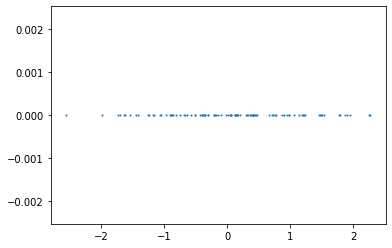

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N=100
np.random.seed(0)
X=np.random.randn(N)
plt.scatter(X,np.zeros(N), s=1)
plt.show()


## By theory

In [2]:
print("the expectation of [mean of N numbers] (theory)", 0)
print("the       stdev of [mean of N numbers] (theory)", 1/np.sqrt(N))

the expectation of [mean of N numbers] (theory) 0
the       stdev of [mean of N numbers] (theory) 0.1


## Or, doing monate carlo, because we know how the N numbers were generated!

In [3]:
np.random.seed(234)
Xs=np.random.randn(100000,N)
rmeans=np.mean(Xs,axis=1)
rmean=np.mean(rmeans)
rstddev=np.std(rmeans, ddof=1)
print("the expectation of [mean of N numbers] (monte carlo)", rmean)
print("the       stdev of [mean of N numbers] (monte carlo)", rstddev)

the expectation of [mean of N numbers] (monte carlo) 4.335782196302293e-05
the       stdev of [mean of N numbers] (monte carlo) 0.10020249094145829


## Or, we can bootstrap with original sample

In [4]:
np.random.seed(234)
sample=np.random.choice(X,size=[100000,N],replace=True)
bmeans=np.mean(sample,axis=1)
bmean=np.mean(bmeans)
bstddev=np.std(bmeans, ddof=1)
print("the expectation of [mean of N numbers] (bootstrap sampling)", bmean)
print("the       stdev of [mean of N numbers] (bootstrap sampling)", bstddev)


the expectation of [mean of N numbers] (bootstrap sampling) 0.06064693264093737
the       stdev of [mean of N numbers] (bootstrap sampling) 0.10097970829675619


## Comparison

the expectation of [mean of N numbers] (theory) 0
the       stdev of [mean of N numbers] (theory) 0.1
the expectation of [mean of N numbers] (monte carlo) 4.335782196302293e-05
the       stdev of [mean of N numbers] (monte carlo) 0.10020249094145829
the expectation of [mean of N numbers] (bootstrap sampling) 0.06064693264093737
the       stdev of [mean of N numbers] (bootstrap sampling) 0.10097970829675619


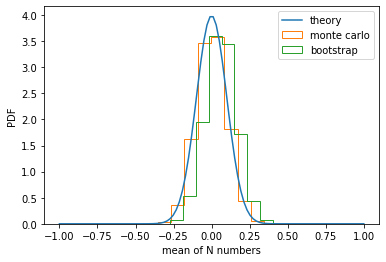

In [5]:
print("the expectation of [mean of N numbers] (theory)", 0)
print("the       stdev of [mean of N numbers] (theory)", 1/np.sqrt(N))
print("the expectation of [mean of N numbers] (monte carlo)", rmean)
print("the       stdev of [mean of N numbers] (monte carlo)", rstddev)
print("the expectation of [mean of N numbers] (bootstrap sampling)", bmean)
print("the       stdev of [mean of N numbers] (bootstrap sampling)", bstddev)


l2=plt.plot(np.linspace(-1,1,100), 1/np.sqrt(2*np.pi)/0.1*np.exp( -np.linspace(-1,1,100)**2 / (2*0.01)), label="theory")
l2=plt.hist(rmeans,density=True,histtype='step',label="monte carlo")
l1=plt.hist(bmeans,density=True,histtype='step',label="bootstrap")
plt.legend()
plt.xlabel("mean of N numbers")
plt.ylabel("PDF")
plt.show()



# Exercise

## Generating N numbers

We can estimate the expectation and standard deviation

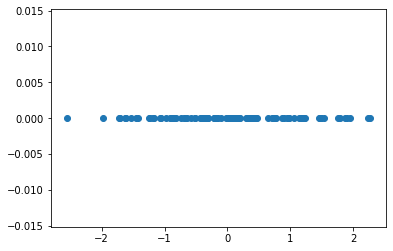

In [6]:
def data_of_unkonw_distribution():
    np.random.seed(0)
    N = 100
    X = np.random.randn(N) + np.random.rand(N) - 0.5
    return X

    X = data_of_unkonw_distribution()


plt.scatter(X, np.zeros(N))
plt.show()



## Parameter estimation

In [7]:
mean = np.mean(X)
stddev = np.std(X, ddof=1)
print("  mean = %.3f" % (mean))
print("stddev = %.3f" % (stddev))

  mean = 0.060
stddev = 1.013


## Error of the estimation
We can estimate the error of mean. But how to estimate the error of stddev?
we can't do monte carlo, because we have don't the exact distribution of the data.

In [8]:
print("  mean = %.3f +- %.3f"%(mean,stddev/np.sqrt(N)))
print("stddev = %.3f +- ?"%(stddev))

  mean = 0.060 +- 0.101
stddev = 1.013 +- ?


## Using bootstrap!

In [9]:
np.random.seed(234)
sample = np.random.choice(X, size=[1000000, N], replace=True)
bmeans = np.mean(sample, axis=1)
bstddevs = np.std(sample, axis=1, ddof=1)

bmeanstddev = np.std(bmeans, ddof=1)
bstddevstddev = np.std(bstddevs, ddof=1)

print("bootstrap 1 sigma error of mean    = %f" % (bmeanstddev))
print("bootstrap 1 sigma error of stddev  = %f" % (bstddevstddev))

bootstrap 1 sigma error of mean    = 0.100781
bootstrap 1 sigma error of stddev  = 0.064653


Wow, the 1 sigma error of mean is closed to the one of theory!
This let use be very confident that standard deviation is also closed to the one of theory!

## Variance of the error

We are lucky there is a formula to calculate the variance of the variance estimator, ${\rm Var}(\hat{\sigma^2})$, in theory. Then we known the standard deviation of the variance estimator, ${\rm Std}[\hat{\sigma^2}]$.
At the first order approximation, we can the calculate the standard deviation of square root of the variance estimator by
$$
{\rm Std}[\sqrt{\hat{\sigma^2}}] \approx \frac{{\rm Std}[\hat{\sigma^2}]}{2\hat{\sigma}}
$$

In [10]:
def estimate_std_of_std(X):
    n = X.shape[0]
    mean = np.mean(X)
    sigma2 = np.sum((X - mean)**2)/(n-1)
    mu_4 = np.mean((X - mean)**4)
    sigma = np.sqrt(sigma2)
    sigma4 = sigma2 *sigma2
    # although sigma2 is unbias, sigma4 is still bias, but it's OK
    var_of_var = mu_4 / n - sigma2**2 * (n - 3) / (n * (n - 1))
    std_of_std = np.sqrt(var_of_var) / (2 * sigma)
    return std_of_std


print(estimate_std_of_std(X))

0.06385819057430948


# Appendix: Estimators


|  <div style="width:150px">  </div> | <div style="width:150px"> symbol </div> |  <div style="width:150px"> formula </div> |
| - | - |    -    |
| expectation,mean|   $\mu$   | $E[x]$ |
| variance|   $\sigma^2$ | $E[(x-\mu)^2]$|
| fourth central moment|  $\mu_4$  |    $E[(x-\mu)^4]$  |
| estimator of mean | $\hat{\mu}$ | $\frac{1}{n} \sum_i x_i$  |
| estimator of variance | $\hat{\sigma^2}$ | $ \frac{1}{n-1}\sum_i (x_i - \hat{\mu})^2 $
| estimator of $\mu_4$ | $\hat{\mu_4}$ | $ \frac{1}{n-1}\sum_i (x_i - \hat{\mu})^4 $
| variance of estimator of expectation |${\rm Var}[\hat{\mu}]$| $\frac{\sigma^2}{n}$|
| variance of estimator of variance | ${\rm Var}[\hat{\sigma^2}]$ | $ {\mu_4\over n}-{\sigma^4\,(n-3)\over n\,(n-1)} $

